# Get to know me: Spotify Data

In the following project my aim is to understand myself through the insights my data is going to reveal. In this notebook we'll go about exploring my data in response to certain questions. This covers one year from the 30th of March of 2020 to 31st of March 2021. 

# Importing the data

In [43]:
import pandas as pd
import numpy as np

df = pd.read_csv('output/final.csv', index_col=0)
# df = df.iloc[:,1:] # removing the first column that is a copy of the index.
df.head()

,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,albumName,albumID
0,Tamborito - Gramophiles Edit___Gramophiles,2020-03-30 18:45,Gramophiles,Tamborito - Gramophiles Edit,200273,2020-03-30 18:45:00,0.733,0.908,2,-3.303,...,105.052,audio_features,1LbfvacbAwzIli4Jyd4vNx,spotify:track:1LbfvacbAwzIli4Jyd4vNx,https://api.spotify.com/v1/tracks/1LbfvacbAwzI...,https://api.spotify.com/v1/audio-analysis/1Lbf...,226857,4,Tamborito (Gramophiles Edit),1c3VDWurS8nwHh0ZIZjXTR
1,Os Cafezais Sem Fim___Nelson Faria,2020-03-31 11:42,Nelson Faria,Os Cafezais Sem Fim,230874,2020-03-31 11:42:00,0.432,0.307,7,-13.805,...,121.541,audio_features,5UmZFRpnB9pPVi59MTadEL,spotify:track:5UmZFRpnB9pPVi59MTadEL,https://api.spotify.com/v1/tracks/5UmZFRpnB9pP...,https://api.spotify.com/v1/audio-analysis/5UmZ...,230875,4,Nelson Faria Convida Wagner Tiso. Um Café Lá E...,5e5hxV3j1vCXtYo3xbNVKK
2,Ay Que Sera Del Sol - Original___Rodrigo Gallardo,2020-03-31 11:49,Rodrigo Gallardo,Ay Que Sera Del Sol - Original,390222,2020-03-31 11:49:00,0.773,0.532,2,-11.297,...,99.993,audio_features,2mDpaQWRfsXtymj7JhVOEE,spotify:track:2mDpaQWRfsXtymj7JhVOEE,https://api.spotify.com/v1/tracks/2mDpaQWRfsXt...,https://api.spotify.com/v1/audio-analysis/2mDp...,390223,4,Summer Sol,6iEbxNzIjuMk3oFWveulAn
3,Fool___Iorie,2020-03-31 11:51,Iorie,Fool,128739,2020-03-31 11:51:00,0.706,0.604,2,-6.932,...,82.030,audio_features,4VEEDnEFLI9dUy5QA51rom,spotify:track:4VEEDnEFLI9dUy5QA51rom,https://api.spotify.com/v1/tracks/4VEEDnEFLI9d...,https://api.spotify.com/v1/audio-analysis/4VEE...,165029,4,fools (can't help falling in love) (feat. Sody),4mNmrwxha3NNfEyciju5wc
4,Ay Que Sera Del Sol - Original___Rodrigo Gallardo,2020-03-31 11:52,Rodrigo Gallardo,Ay Que Sera Del Sol - Original,71285,2020-03-31 11:52:00,0.773,0.532,2,-11.297,...,99.993,audio_features,2mDpaQWRfsXtymj7JhVOEE,spotify:track:2mDpaQWRfsXtymj7JhVOEE,https://api.spotify.com/v1/tracks/2mDpaQWRfsXt...,https://api.spotify.com/v1/audio-analysis/2mDp...,390223,4,Summer Sol,6iEbxNzIjuMk3oFWveulAn


In [44]:
max_date = df['datetime'].max()
min_date = df['datetime'].min()
print(f'This dataset goes from {min_date} to {max_date}')

This dataset goes from 2020-03-30 18:45:00 to 2021-03-31 22:40:00


# EDA

## Dropping unnecessary columns

In [45]:
df = df.drop(columns=['uri', 'track_href', 'analysis_url', 'type', 'albumID'])
df.head()

,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,albumName
0,Tamborito - Gramophiles Edit___Gramophiles,2020-03-30 18:45,Gramophiles,Tamborito - Gramophiles Edit,200273,2020-03-30 18:45:00,0.733,0.908,2,-3.303,...,0.1090,0.01490,0.00913,0.2090,0.501,105.052,1LbfvacbAwzIli4Jyd4vNx,226857,4,Tamborito (Gramophiles Edit)
1,Os Cafezais Sem Fim___Nelson Faria,2020-03-31 11:42,Nelson Faria,Os Cafezais Sem Fim,230874,2020-03-31 11:42:00,0.432,0.307,7,-13.805,...,0.0376,0.90200,0.86800,0.1770,0.370,121.541,5UmZFRpnB9pPVi59MTadEL,230875,4,Nelson Faria Convida Wagner Tiso. Um Café Lá E...
2,Ay Que Sera Del Sol - Original___Rodrigo Gallardo,2020-03-31 11:49,Rodrigo Gallardo,Ay Que Sera Del Sol - Original,390222,2020-03-31 11:49:00,0.773,0.532,2,-11.297,...,0.0674,0.00278,0.86000,0.0449,0.389,99.993,2mDpaQWRfsXtymj7JhVOEE,390223,4,Summer Sol
3,Fool___Iorie,2020-03-31 11:51,Iorie,Fool,128739,2020-03-31 11:51:00,0.706,0.604,2,-6.932,...,0.3030,0.41800,0.00000,0.2420,0.361,82.030,4VEEDnEFLI9dUy5QA51rom,165029,4,fools (can't help falling in love) (feat. Sody)
4,Ay Que Sera Del Sol - Original___Rodrigo Gallardo,2020-03-31 11:52,Rodrigo Gallardo,Ay Que Sera Del Sol - Original,71285,2020-03-31 11:52:00,0.773,0.532,2,-11.297,...,0.0674,0.00278,0.86000,0.0449,0.389,99.993,2mDpaQWRfsXtymj7JhVOEE,390223,4,Summer Sol


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16268 entries, 0 to 16267
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16268 non-null  object 
 1   endTime           16268 non-null  object 
 2   artistName        16268 non-null  object 
 3   trackName         16268 non-null  object 
 4   msPlayed          16268 non-null  int64  
 5   datetime          16268 non-null  object 
 6   danceability      16268 non-null  float64
 7   energy            16268 non-null  float64
 8   key               16268 non-null  int64  
 9   loudness          16268 non-null  float64
 10  mode              16268 non-null  int64  
 11  speechiness       16268 non-null  float64
 12  acousticness      16268 non-null  float64
 13  instrumentalness  16268 non-null  float64
 14  liveness          16268 non-null  float64
 15  valence           16268 non-null  float64
 16  tempo             16268 non-null  float6

# EDA

In [47]:
print("The number of streamings are: {}".format(len(df)+1))

The number of streamings are: 16269


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
feat_cols = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

<Figure size 1440x1440 with 0 Axes>

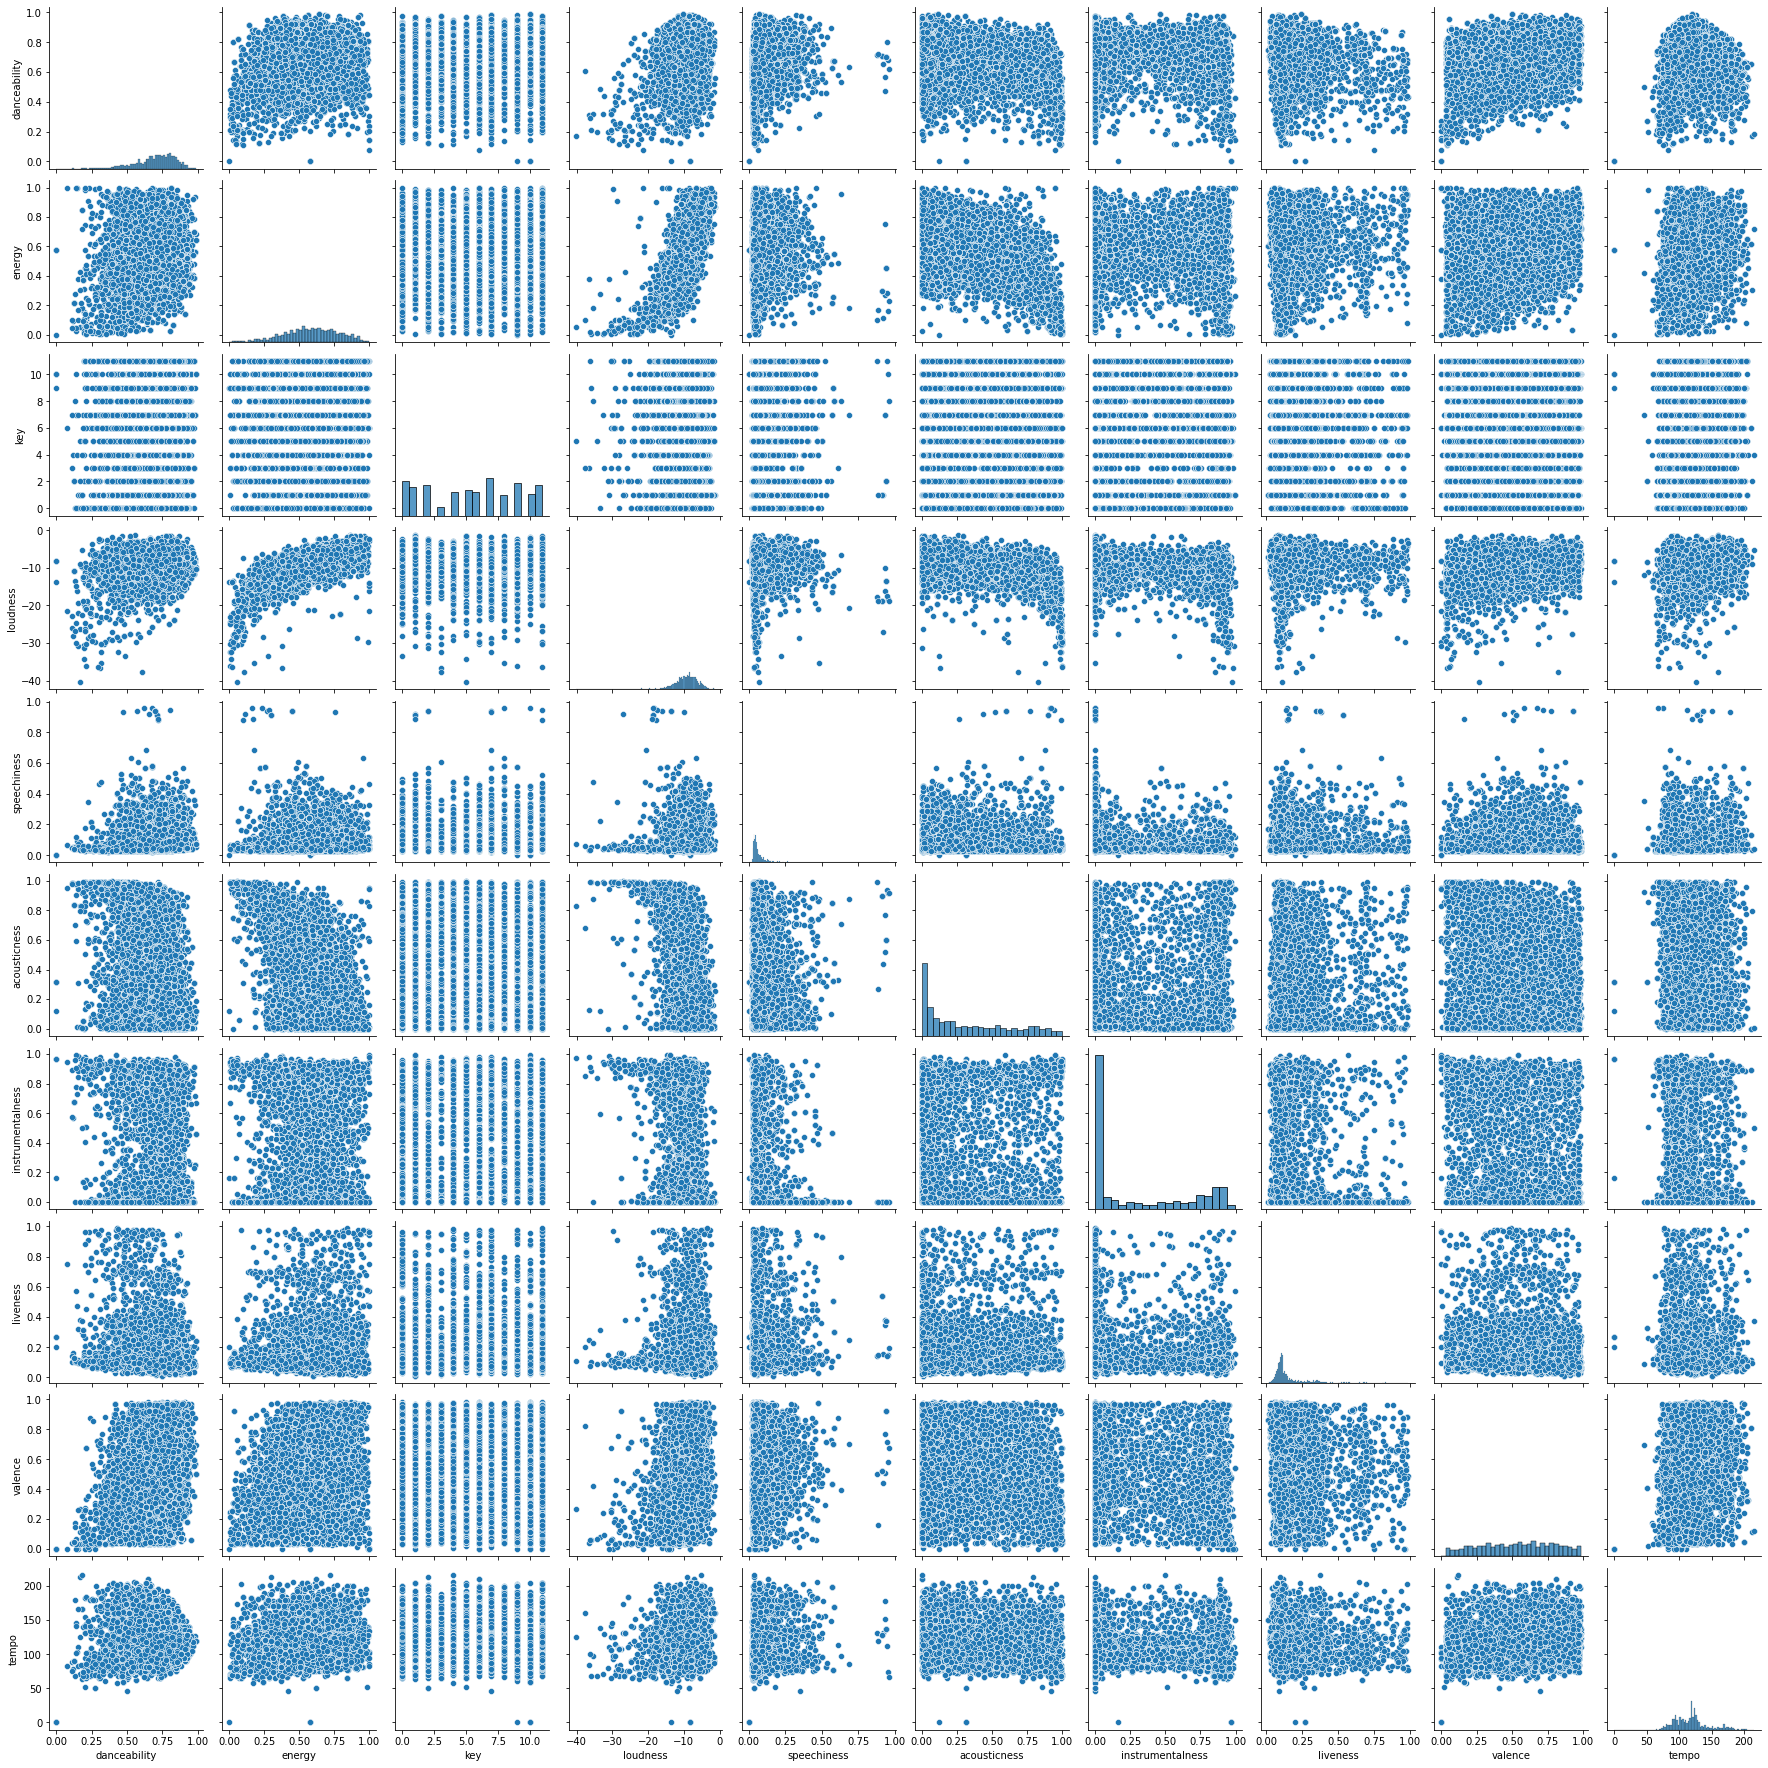

In [22]:
plt.figure(figsize=(20,20))
sns.pairplot(df[feat_cols])

As it can be observed, variables such as **Energy** and **Loudness** seem to be positively correlated, where as most other variables do not show any significant correlations. 

 The distributions of **Instrumentalness** and **Acousticness** are very skewed towards lower values. 

## Are any of these attributes correlated?

<AxesSubplot:>

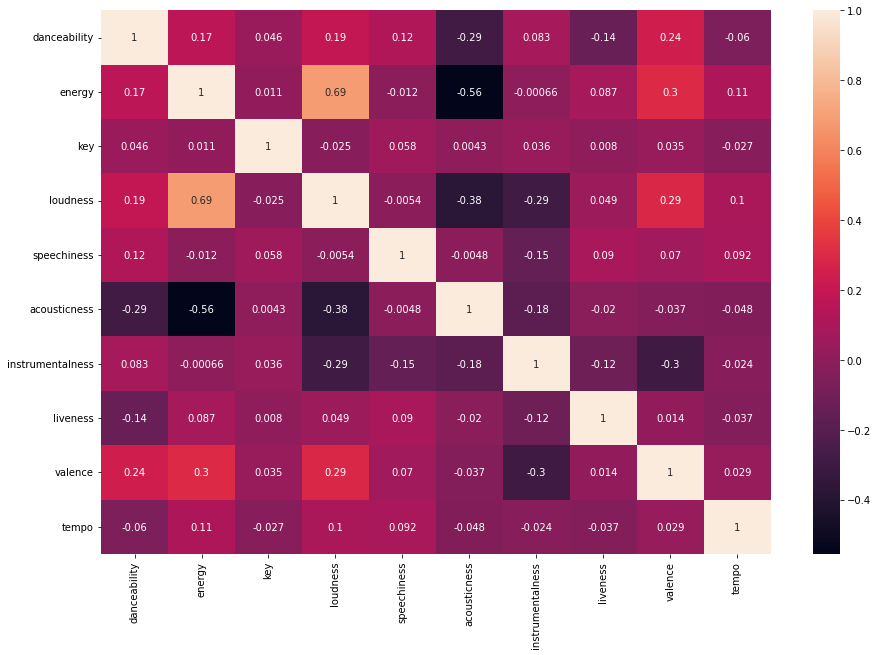

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(df[feat_cols].corr(), annot=True)

Most features are not very correlated, however, we can see some obvious ones in the case of acousticness having a negative correlation with energy and loudness. Following this same logic we can observe that energy and loudness are very correlated (0.69).

## What are the artists I listen to the most?

### Groupby

In [50]:
gr = df.groupby(['artistName']).size().reset_index(name='counts')
gr = gr.sort_values(by='counts', ascending=False).head(20)

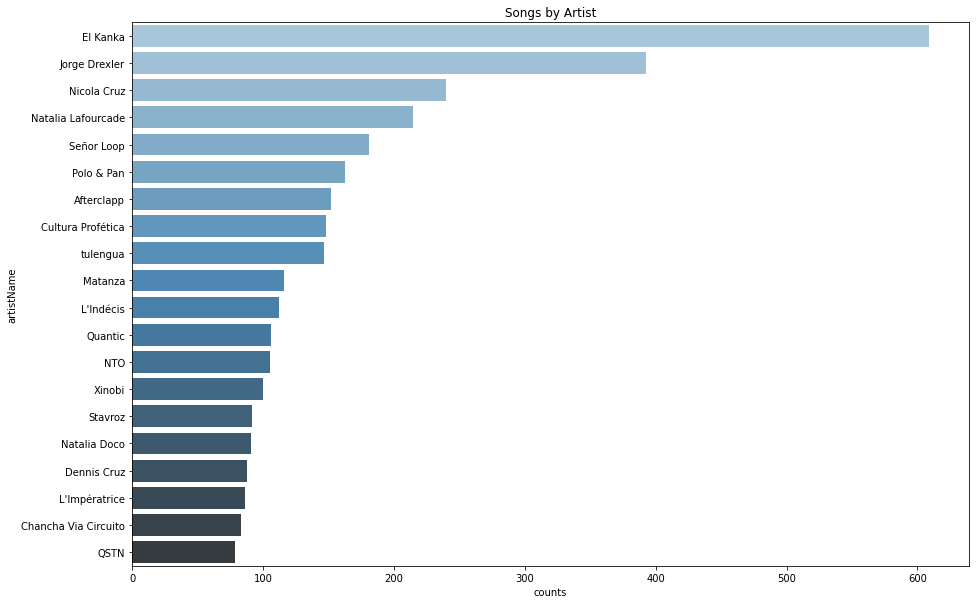

In [51]:

fig, ax = plt.subplots(figsize=(15,10), nrows=1)
sns.barplot(data=gr, y='artistName', x='counts', palette="Blues_d", ax=ax)
ax.set_title("Songs by Artist")
plt.show()

## What did I listen to during the lockdown?

### Artists

In [52]:
lockdown = df[(df['datetime']>'2020-03') & (df['datetime']<'2020-06')]
gr_lock = lockdown.groupby(['artistName']).size().reset_index(name='counts')
gr_lock = gr_lock.sort_values(by='counts', ascending=False).head(20)

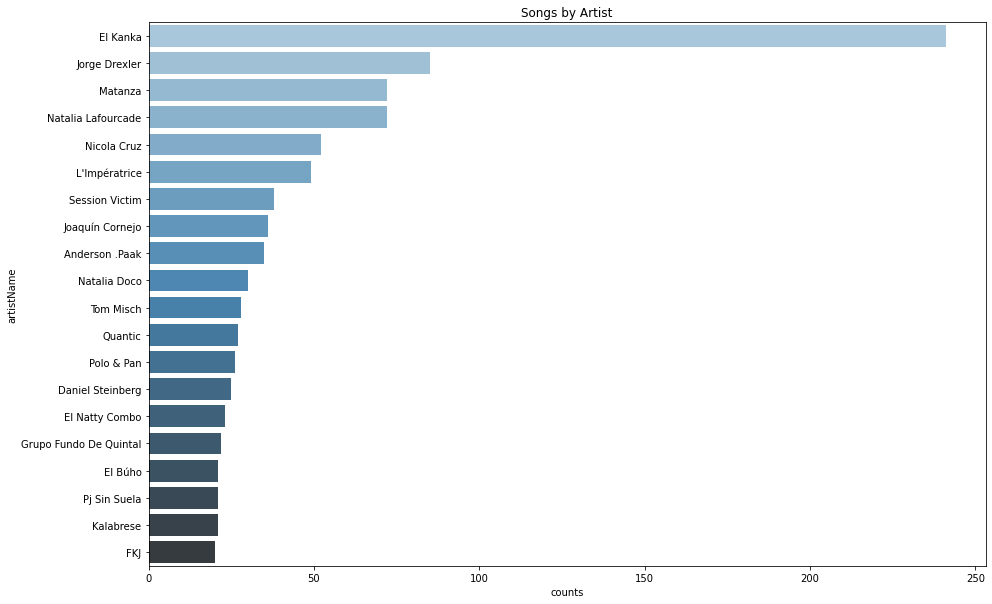

In [53]:
fig, ax = plt.subplots(figsize=(15,10), nrows=1)
sns.barplot(data=gr_lock, y='artistName', x='counts', palette="Blues_d", ax=ax)
ax.set_title("Songs by Artist")
plt.show()

### Songs

In [54]:
gr_lock = lockdown.groupby(['trackName']).size().reset_index(name='counts')
gr_lock = gr_lock.sort_values(by='counts', ascending=False).head(20)

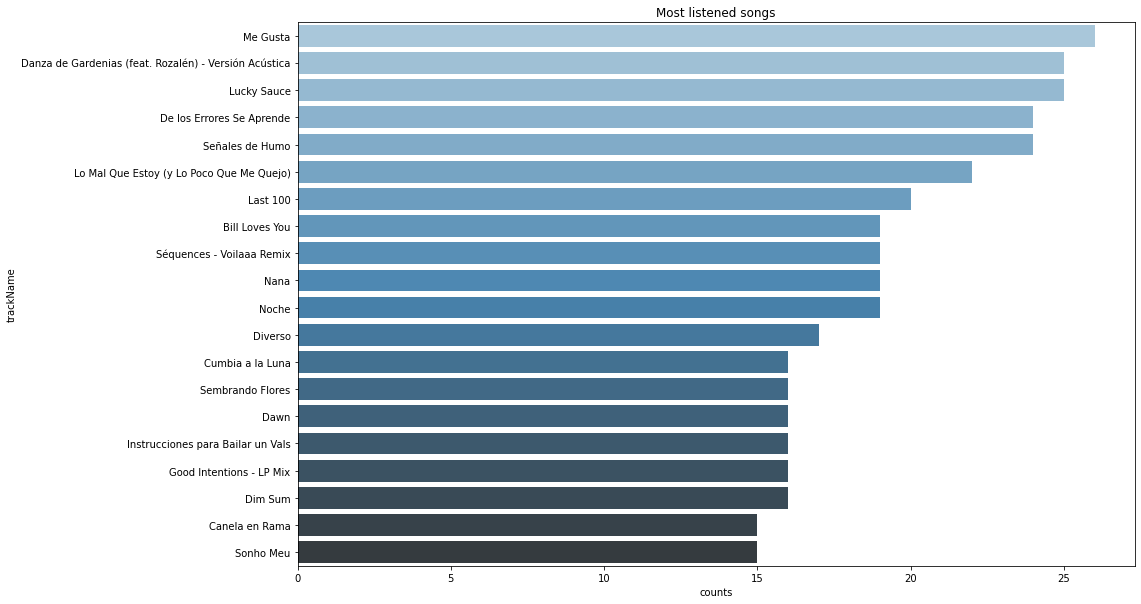

In [55]:
fig, ax = plt.subplots(figsize=(15,10), nrows=1)
sns.barplot(data=gr_lock, y='trackName', x='counts', palette="Blues_d", ax=ax)
ax.set_title("Most listened songs")
plt.show()

Out of my top 5 songs, 3 are from El Kanka and despite the fact that Jorge Drexler was my second most heard artist, his songs were not present during my lockdown. 

In [56]:
df.head()

,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,albumName
0,Tamborito - Gramophiles Edit___Gramophiles,2020-03-30 18:45,Gramophiles,Tamborito - Gramophiles Edit,200273,2020-03-30 18:45:00,0.733,0.908,2,-3.303,...,0.1090,0.01490,0.00913,0.2090,0.501,105.052,1LbfvacbAwzIli4Jyd4vNx,226857,4,Tamborito (Gramophiles Edit)
1,Os Cafezais Sem Fim___Nelson Faria,2020-03-31 11:42,Nelson Faria,Os Cafezais Sem Fim,230874,2020-03-31 11:42:00,0.432,0.307,7,-13.805,...,0.0376,0.90200,0.86800,0.1770,0.370,121.541,5UmZFRpnB9pPVi59MTadEL,230875,4,Nelson Faria Convida Wagner Tiso. Um Café Lá E...
2,Ay Que Sera Del Sol - Original___Rodrigo Gallardo,2020-03-31 11:49,Rodrigo Gallardo,Ay Que Sera Del Sol - Original,390222,2020-03-31 11:49:00,0.773,0.532,2,-11.297,...,0.0674,0.00278,0.86000,0.0449,0.389,99.993,2mDpaQWRfsXtymj7JhVOEE,390223,4,Summer Sol
3,Fool___Iorie,2020-03-31 11:51,Iorie,Fool,128739,2020-03-31 11:51:00,0.706,0.604,2,-6.932,...,0.3030,0.41800,0.00000,0.2420,0.361,82.030,4VEEDnEFLI9dUy5QA51rom,165029,4,fools (can't help falling in love) (feat. Sody)
4,Ay Que Sera Del Sol - Original___Rodrigo Gallardo,2020-03-31 11:52,Rodrigo Gallardo,Ay Que Sera Del Sol - Original,71285,2020-03-31 11:52:00,0.773,0.532,2,-11.297,...,0.0674,0.00278,0.86000,0.0449,0.389,99.993,2mDpaQWRfsXtymj7JhVOEE,390223,4,Summer Sol


## Mean acousticness by Artist 

Knowing I like acoustic music, I wanted to see which artists within my streaming data are the most acoustic. 

In [63]:
gr1 = df.groupby(['artistName'])['acousticness'].mean().sort_values(ascending=False)
gr1_top30 = gr1.reset_index(name='mean acousticness').head(30)
gr1_top30

,artistName,mean acousticness
0,Davorka Poljak,0.996000
1,Calamantos,0.995000
2,AMyn,0.995000
3,Hilder Sky,0.995000
4,Vincent Brahn,0.994000
5,Manuel Obregón,0.994000
6,Eux Zautes,0.993000
7,Yann Tiersen,0.991000
8,Hermann,0.991000
9,Frédéric Chopin,0.989800


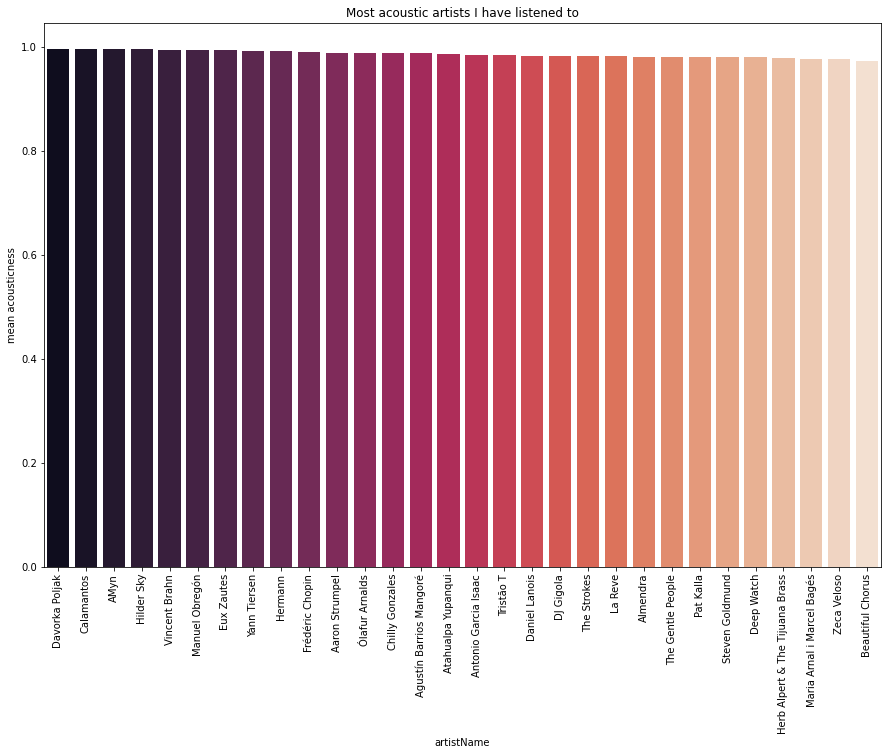

In [61]:
fig, ax = plt.subplots(figsize=(15,10), nrows=1)
p = sns.barplot(data=gr1_top30, x='artistName', y='mean acousticness', palette='rocket', ax=ax)
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title("Most acoustic artists I have listened to")
plt.show()

# Top 20 most Energetic songs

In [67]:
gr_energy = df.groupby(['artistName'])['energy'].mean().sort_values(ascending=False)
gr_energy = gr_energy.reset_index(name='mean energy').head(20)
gr_energy

,artistName,mean energy
0,Rivers and Streams,1.0000
1,Forest Sounds,1.0000
2,Pinetree Way,1.0000
3,Renegades: Born in the USA,0.9970
4,Shaman,0.9970
5,Boston 168,0.9950
6,In Verruf,0.9900
7,Umwelt,0.9880
8,Rudosa,0.9870
9,The Rainforest Collective,0.9850


Here I see some results that are dubious. Renegades is the podcast that Barack Obama has with Bruce Springsteen and I wouldn't characterize it as energetic as it is mainly talking, and let's face it Obama is not the most energetic speaker. 

In [68]:
df[df['artistName'] == 'Renegades: Born in the USA']

,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,albumName
15256,Race in the United States___Renegades: Born in...,2021-03-02 08:32,Renegades: Born in the USA,Race in the United States,1279334,2021-03-02 08:32:00,0.447,0.997,0,-2.348,...,0.325,0.163,0.0,0.884,0.105,134.039,4hiTbBpSeWGkkBC7YlTY9w,160884,4,The Powers That B


It is not very ideal for me since I do not remember listening to most of these artists. We need a measure for popularity in my streamings. 

## How can we measure popularity?


Do we base popularity as the amount of time played (msPlayed) or in the number of times a song was played?

In [69]:
df.head()

,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,albumName
0,Tamborito - Gramophiles Edit___Gramophiles,2020-03-30 18:45,Gramophiles,Tamborito - Gramophiles Edit,200273,2020-03-30 18:45:00,0.733,0.908,2,-3.303,...,0.1090,0.01490,0.00913,0.2090,0.501,105.052,1LbfvacbAwzIli4Jyd4vNx,226857,4,Tamborito (Gramophiles Edit)
1,Os Cafezais Sem Fim___Nelson Faria,2020-03-31 11:42,Nelson Faria,Os Cafezais Sem Fim,230874,2020-03-31 11:42:00,0.432,0.307,7,-13.805,...,0.0376,0.90200,0.86800,0.1770,0.370,121.541,5UmZFRpnB9pPVi59MTadEL,230875,4,Nelson Faria Convida Wagner Tiso. Um Café Lá E...
2,Ay Que Sera Del Sol - Original___Rodrigo Gallardo,2020-03-31 11:49,Rodrigo Gallardo,Ay Que Sera Del Sol - Original,390222,2020-03-31 11:49:00,0.773,0.532,2,-11.297,...,0.0674,0.00278,0.86000,0.0449,0.389,99.993,2mDpaQWRfsXtymj7JhVOEE,390223,4,Summer Sol
3,Fool___Iorie,2020-03-31 11:51,Iorie,Fool,128739,2020-03-31 11:51:00,0.706,0.604,2,-6.932,...,0.3030,0.41800,0.00000,0.2420,0.361,82.030,4VEEDnEFLI9dUy5QA51rom,165029,4,fools (can't help falling in love) (feat. Sody)
4,Ay Que Sera Del Sol - Original___Rodrigo Gallardo,2020-03-31 11:52,Rodrigo Gallardo,Ay Que Sera Del Sol - Original,71285,2020-03-31 11:52:00,0.773,0.532,2,-11.297,...,0.0674,0.00278,0.86000,0.0449,0.389,99.993,2mDpaQWRfsXtymj7JhVOEE,390223,4,Summer Sol


In [70]:
np.mean(df['endTime'] != df['datetime'])

1.0

Here we might be tempted to think there are no identical dates in both of those columns but that is just because they are not written in the same way. These two columns will not help us determine a measure for popularity. However, the `ms played` variable will be the measure with use for popularity. We can aggregate by artist and then display the `ms_played` in **descending** oder to find my most popular artists. 

### Groupby artistName --> ms_played

In [71]:
gr_ms = df.groupby(['artistName'])['msPlayed'].mean().sort_values(ascending=False)
gr_ms = gr_ms.reset_index(name="mean msPlayed").head(30)
gr_ms

,artistName,mean msPlayed
0,Duncan Trussell Family Hour,2.854351e+06
1,Renegades: Born in the USA,1.279334e+06
2,Afrika 70,9.316000e+05
3,Akua Naru,6.187920e+05
4,Vis à Vis,5.907060e+05
5,Ilario Alicante,5.896060e+05
6,Woolfy,5.462930e+05
7,James Brown,5.446400e+05
8,SAUS,5.444080e+05
9,Beyhude,5.441820e+05


Here we see that sorting with Miliseconds might not be very interpretable so we'll create a new column called Minutes were we can make the same groupby operation. 

In [72]:
df['minutes'] = (df['msPlayed']/1000)/60
df.head()

,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,albumName,minutes
0,Tamborito - Gramophiles Edit___Gramophiles,2020-03-30 18:45,Gramophiles,Tamborito - Gramophiles Edit,200273,2020-03-30 18:45:00,0.733,0.908,2,-3.303,...,0.01490,0.00913,0.2090,0.501,105.052,1LbfvacbAwzIli4Jyd4vNx,226857,4,Tamborito (Gramophiles Edit),3.337883
1,Os Cafezais Sem Fim___Nelson Faria,2020-03-31 11:42,Nelson Faria,Os Cafezais Sem Fim,230874,2020-03-31 11:42:00,0.432,0.307,7,-13.805,...,0.90200,0.86800,0.1770,0.370,121.541,5UmZFRpnB9pPVi59MTadEL,230875,4,Nelson Faria Convida Wagner Tiso. Um Café Lá E...,3.847900
2,Ay Que Sera Del Sol - Original___Rodrigo Gallardo,2020-03-31 11:49,Rodrigo Gallardo,Ay Que Sera Del Sol - Original,390222,2020-03-31 11:49:00,0.773,0.532,2,-11.297,...,0.00278,0.86000,0.0449,0.389,99.993,2mDpaQWRfsXtymj7JhVOEE,390223,4,Summer Sol,6.503700
3,Fool___Iorie,2020-03-31 11:51,Iorie,Fool,128739,2020-03-31 11:51:00,0.706,0.604,2,-6.932,...,0.41800,0.00000,0.2420,0.361,82.030,4VEEDnEFLI9dUy5QA51rom,165029,4,fools (can't help falling in love) (feat. Sody),2.145650
4,Ay Que Sera Del Sol - Original___Rodrigo Gallardo,2020-03-31 11:52,Rodrigo Gallardo,Ay Que Sera Del Sol - Original,71285,2020-03-31 11:52:00,0.773,0.532,2,-11.297,...,0.00278,0.86000,0.0449,0.389,99.993,2mDpaQWRfsXtymj7JhVOEE,390223,4,Summer Sol,1.188083


### Groupby artistName ---> Minutes

In [73]:
gr_min = df.groupby(['artistName'])['minutes'].sum().sort_values(ascending=False)
gr_min = gr_min.reset_index(name="Total minutes played").head(30)
gr_min

,artistName,Total minutes played
0,El Kanka,1616.252617
1,Jorge Drexler,1005.980317
2,Nicola Cruz,817.132533
3,Natalia Lafourcade,696.105667
4,Señor Loop,637.655250
5,Matanza,540.251800
6,Afterclapp,539.705117
7,Polo & Pan,539.007233
8,Stavroz,457.846367
9,Cultura Profética,457.356517


Here again, most of these artists I do not recognize and despite this it seems that the Duncan Trussel and Renegades podcast have the highest mean minutes played. The problem here is that if I listen to only two songs from an artist and I listened to the full songs both times, then the mean minutes played for that artist might be very high, despite me not listening to it often. For this reason, "mean minutes played" is still not a good measure for popularity. 

 At this point we can combine the first groupby done by artist counts and add the minutes column to it in order to visualize the aggregated amount of minutes I have listened to these artists. 

In [74]:
hours_played = df['minutes'].sum()/60
print("In a year I listened to {} hours of music on Spotify!!".format(round(hours_played)))

In a year I listened to 885 hours of music on Spotify!!


In [138]:
gr_min = df.groupby(['artistName']).size().reset_index(name='counts')
gr = gr.sort_values(by='counts', ascending=False).head(20)

In [139]:
gr_min = df.groupby(['artistName'])['minutes'].sum().reset_index(name='minutes per artist')
gr_min = gr_min.sort_values(by='minutes per artist',ascending=False).head(30)
gr_min

,artistName,minutes per artist
675,El Kanka,1616.252617
1084,Jorge Drexler,1005.980317
1680,Nicola Cruz,817.132533
1653,Natalia Lafourcade,696.105667
2062,Señor Loop,637.655250
1495,Matanza,540.251800
44,Afterclapp,539.705117
1859,Polo & Pan,539.007233
2139,Stavroz,457.846367
496,Cultura Profética,457.356517


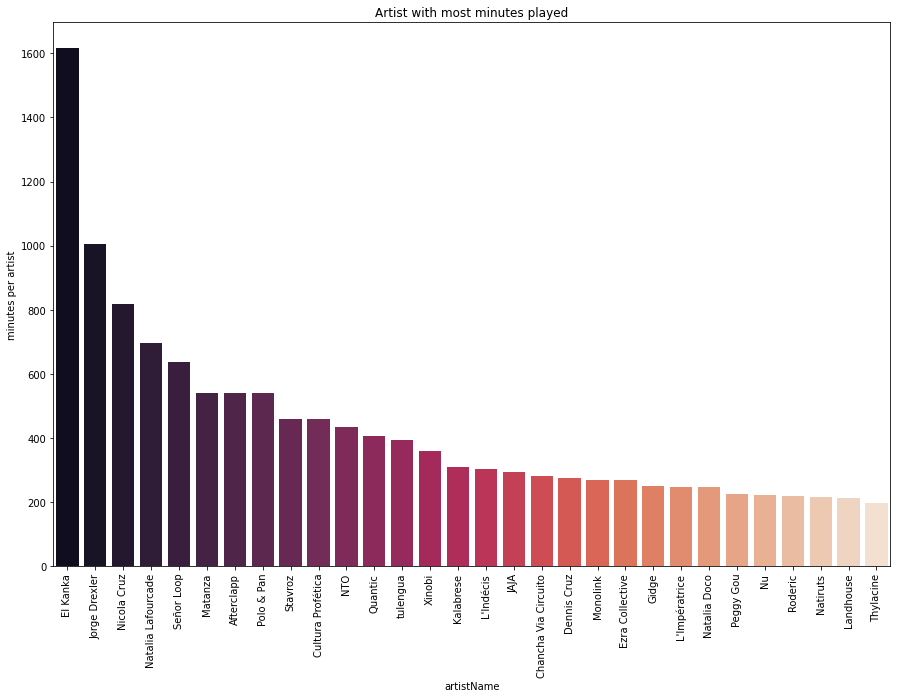

In [77]:
fig, ax = plt.subplots(figsize=(15,10), nrows=1)
p = sns.barplot(data=gr_min, x='artistName',y='minutes per artist', palette='rocket', ax=ax)
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title('Artist with most minutes played')
plt.show()

By finding first, the artists that have the most counts and then finding out how many minutes I have listened to in total we can observe that **El Kanka** is my most listened to artist. This is very interesting as I discovered El Kanka about a couple years ago and didn't know that I had become more popular to me than **Jorge Drexler**. 

Therefore it seems that my top 3 artists are:

1. El Kanka
2. Jorge Drexler and,
3. Nicola Cruz

I wonder how many times I have left spotify playing music without me actually listening to it only to realize it all gets counted in the end. For some of the artist I discovered just last year we could even check when exactly did I listen to them in the first place. We can build a function that upon giving it the artist as an argument will go and look for the earliest day on record that I streamed it. 

### When did I start listening to X artist?

First, we'll need to convert the datetime column into a datetime object. 

In [78]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16268 entries, 0 to 16267
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              16268 non-null  object        
 1   endTime           16268 non-null  object        
 2   artistName        16268 non-null  object        
 3   trackName         16268 non-null  object        
 4   msPlayed          16268 non-null  int64         
 5   datetime          16268 non-null  datetime64[ns]
 6   danceability      16268 non-null  float64       
 7   energy            16268 non-null  float64       
 8   key               16268 non-null  int64         
 9   loudness          16268 non-null  float64       
 10  mode              16268 non-null  int64         
 11  speechiness       16268 non-null  float64       
 12  acousticness      16268 non-null  float64       
 13  instrumentalness  16268 non-null  float64       
 14  liveness          1626

In [79]:
def first_date(artist):
    
    initial_date = df[df['artistName'] == artist]['datetime'].min()
    print("Your first listened to {a} on this date: {b}".format(a=artist, b=initial_date))

Here we have an example of the kind of information we want. However, I have been listening to The Beatles for many many years now, so we can try with a new artist. 

In [72]:
df[df['artistName'] == 'The Beatles']['datetime'].min()

Timestamp('2020-07-04 07:58:00')

In [80]:
nto_init_date = first_date('NTO')

Your first listened to NTO on this date: 2020-08-24 22:33:00


In [81]:
xinobi_init_date = first_date('Xinobi')

Your first listened to Xinobi on this date: 2020-06-23 16:25:00


### Breaking down the Date column

In [87]:
df["month"] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df.head()

,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,...,liveness,valence,tempo,id,duration_ms,time_signature,albumName,minutes,month,day
0,Tamborito - Gramophiles Edit___Gramophiles,2020-03-30 18:45,Gramophiles,Tamborito - Gramophiles Edit,200273,2020-03-30 18:45:00,0.733,0.908,2,-3.303,...,0.2090,0.501,105.052,1LbfvacbAwzIli4Jyd4vNx,226857,4,Tamborito (Gramophiles Edit),3.337883,3,30
1,Os Cafezais Sem Fim___Nelson Faria,2020-03-31 11:42,Nelson Faria,Os Cafezais Sem Fim,230874,2020-03-31 11:42:00,0.432,0.307,7,-13.805,...,0.1770,0.370,121.541,5UmZFRpnB9pPVi59MTadEL,230875,4,Nelson Faria Convida Wagner Tiso. Um Café Lá E...,3.847900,3,31
2,Ay Que Sera Del Sol - Original___Rodrigo Gallardo,2020-03-31 11:49,Rodrigo Gallardo,Ay Que Sera Del Sol - Original,390222,2020-03-31 11:49:00,0.773,0.532,2,-11.297,...,0.0449,0.389,99.993,2mDpaQWRfsXtymj7JhVOEE,390223,4,Summer Sol,6.503700,3,31
3,Fool___Iorie,2020-03-31 11:51,Iorie,Fool,128739,2020-03-31 11:51:00,0.706,0.604,2,-6.932,...,0.2420,0.361,82.030,4VEEDnEFLI9dUy5QA51rom,165029,4,fools (can't help falling in love) (feat. Sody),2.145650,3,31
4,Ay Que Sera Del Sol - Original___Rodrigo Gallardo,2020-03-31 11:52,Rodrigo Gallardo,Ay Que Sera Del Sol - Original,71285,2020-03-31 11:52:00,0.773,0.532,2,-11.297,...,0.0449,0.389,99.993,2mDpaQWRfsXtymj7JhVOEE,390223,4,Summer Sol,1.188083,3,31


### Scaling feature attributes

We'll use the StandardScaler to standardize all the feature variables which are continous. 

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16268 entries, 0 to 16267
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              16268 non-null  object        
 1   endTime           16268 non-null  object        
 2   artistName        16268 non-null  object        
 3   trackName         16268 non-null  object        
 4   msPlayed          16268 non-null  int64         
 5   datetime          16268 non-null  datetime64[ns]
 6   danceability      16268 non-null  float64       
 7   energy            16268 non-null  float64       
 8   key               16268 non-null  int64         
 9   loudness          16268 non-null  float64       
 10  mode              16268 non-null  int64         
 11  speechiness       16268 non-null  float64       
 12  acousticness      16268 non-null  float64       
 13  instrumentalness  16268 non-null  float64       
 14  liveness          1626

In [89]:
df.describe()

,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,minutes,month,day
count,1.626800e+04,16268.000000,16268.000000,16268.000000,16268.000000,16268.000000,16268.000000,16268.000000,16268.000000,16268.000000,16268.000000,16268.000000,1.626800e+04,16268.000000,16268.000000,16268.000000,16268.000000
mean,1.959404e+05,0.700990,0.582568,5.511003,-9.428598,0.482481,0.083662,0.322734,0.309148,0.170459,0.527783,117.543456,2.775818e+05,3.936624,3.265673,6.854623,15.787743
std,1.486064e+05,0.141464,0.194400,3.584930,3.455078,0.499708,0.079587,0.300564,0.360434,0.152923,0.256572,25.771884,1.010828e+05,0.307451,2.476773,3.601561,9.272180
min,0.000000e+00,0.000000,0.000229,0.000000,-40.262000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,2.353400e+04,0.000000,0.000000,1.000000,1.000000
25%,4.193325e+04,0.628000,0.450000,2.000000,-11.129000,0.000000,0.040900,0.046600,0.000113,0.090500,0.323750,98.006500,2.082150e+05,4.000000,0.698887,4.000000,7.000000
50%,2.095945e+05,0.725000,0.590000,6.000000,-9.038000,0.000000,0.054700,0.226000,0.069150,0.111000,0.539000,117.016500,2.513330e+05,4.000000,3.493242,7.000000,16.000000
75%,2.875800e+05,0.804000,0.728000,9.000000,-7.202000,1.000000,0.090425,0.558250,0.709000,0.177000,0.738000,127.014000,3.385470e+05,4.000000,4.793000,10.000000,24.000000
max,5.103165e+06,0.988000,1.000000,11.000000,-1.148000,1.000000,0.958000,0.996000,0.994000,0.986000,0.984000,215.523000,1.412451e+06,5.000000,85.052750,12.000000,31.000000


# Find similar songs

In [121]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

df_cos_sim = df[['artistName','danceability','energy','loudness', 'liveness', 'acousticness', 'speechiness','instrumentalness','valence']]

In [122]:
len(df_cos_sim)

16268

In [123]:
gr_artist = df_cos_sim.groupby('artistName').mean()
gr_artist

,danceability,energy,loudness,liveness,acousticness,speechiness,instrumentalness,valence
artistName,,,,,,,,
((( O ))),-0.657360,-0.882577,-0.185646,-0.107633,1.914012,-0.618994,1.672623,-1.651766
-M-,-0.940127,-0.537916,-0.913293,-0.186106,0.839333,-0.248320,-0.408265,-1.484166
070 Shake,-2.021709,1.519760,1.672546,0.337050,-0.886142,2.969633,-0.848082,-0.852744
1gnition,0.523190,0.233712,-0.305473,0.140866,-0.991281,-0.449363,1.250896,1.018137
2Pac,1.145276,1.105652,1.373991,0.153291,-0.953018,1.329872,-0.854935,1.261741
...,...,...,...,...,...,...,...,...
Ø Suave,0.084902,0.737843,0.005962,-0.441144,-1.071100,-0.008324,-0.856621,1.583298
ØDYSSEE,-0.063551,-0.831135,0.820730,-0.591552,0.826025,0.085915,1.370201,-1.219125
МЫ,-0.091827,-0.862000,-1.280590,0.997534,-0.088950,-0.308633,-0.582505,-0.696837


In [124]:
ss = StandardScaler()
gr_artist_scaled = ss.fit_transform(gr_artist)
gr_artist_scaled = pd.DataFrame(data=gr_artist_scaled, index=gr_artist.index, columns=gr_artist.columns)

gr_artist_scaled.head()

,danceability,energy,loudness,liveness,acousticness,speechiness,instrumentalness,valence
artistName,,,,,,,,
((( O ))),-0.529411,-0.970352,-0.221375,-0.124067,2.090189,-0.675463,1.832436,-1.738455
-M-,-0.812038,-0.615016,-0.910533,-0.212057,0.948235,-0.281325,-0.354700,-1.564968
070 Shake,-1.893086,1.506398,1.538527,0.374541,-0.885255,3.140331,-0.816973,-0.911368
1gnition,0.650557,0.180514,-0.334864,0.154567,-0.996976,-0.495095,1.389176,1.025226
2Pac,1.272336,1.079463,1.255764,0.168498,-0.956318,1.396770,-0.824176,1.277387


In [125]:
artist_array = np.array(gr_artist_scaled.T['Jorge Drexler']).reshape(1,-1)
artist_dataset_array = gr_artist_scaled.drop(index='Jorge Drexler').values
cosine_similarity(artist_array, artist_dataset_array)

array([[ 0.2140094 ,  0.43450766, -0.25659554, ...,  0.35650236,
         0.43984239, -0.36910368]])

In [126]:
def get_cosim_artist_df(artist_name, df, n):
    ss = StandardScaler()
    df_scaled = ss.fit_transform(df)
    df = pd.DataFrame(data=df_scaled, index=df.index)
    
    artist_array = np.array(df.T[artist_name]).reshape(1,-1)
    dataset_array = df.drop(index=artist_name).values
    
    cosim_scores = cosine_similarity(artist_array, dataset_array).flatten()
    artist_names_array = df.drop(index=artist_name).index.values
    
    df_result = pd.DataFrame(
        data = {
            'artist'               : artist_names_array,
            'cosim_' + artist_name : cosim_scores,
        }
    )
    
    df_result = df_result.sort_values(by='cosim_' + artist_name, ascending=False).head(n)    
    return df_result.reset_index(drop=True)

In [127]:
get_cosim_artist_df('Jorge Drexler', gr_artist, 20)

,artist,cosim_Jorge Drexler
0,Mallu Magalhães,0.949129
1,Pauline Croze,0.937022
2,Sofía Viola,0.913471
3,The Knocks,0.904878
4,Gepe,0.900844
5,El Kuelgue,0.900259
6,Muerdo,0.893019
7,Lianne La Havas,0.892969
8,Kanaku y El Tigre,0.892137
9,Diego Lorenzini,0.888360


In [115]:
get_cosim_artist_df('Natalia Lafourcade', gr_artist, 20)

,artist,cosim_Natalia Lafourcade
0,Tora,0.989545
1,Zoe Gotusso,0.971859
2,Club del Río,0.960267
3,Ibrahim Ferrer,0.958463
4,Sofía Viola,0.956860
5,Ainda,0.949791
6,Lianne La Havas,0.946642
7,Porcelain Heart,0.942909
8,Orquesta Sublime,0.942610
9,Charlotte Dos Santos,0.941865
